In [ ]:
import pandas as pd
import contractions
import re
import stopwords
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textatistic import Textatistic

In [ ]:
cleaned_dataset = pd.read_excel("../Data/gerald_data_processed.xlsx", engine = "openpyxl")

# EDA

This is the EDA file for the following columns:
1. industry
2. function
3. salary_range
4. benefits

In [ ]:
df = cleaned_dataset
tj = df[["salary_range","benefits","industry","function", "fraudulent"]]
print(tj.info())

The industry and function columns are categorical, and they will be explored together with similar steps.

In [9]:
print("Description of Industry: ")
print(tj["industry"].describe())
print("\nDescription of Function: ")
print(tj["function"].describe())

tj["function"].fillna("None", inplace = True)
tj["industry"].fillna("None", inplace = True)

industry_value_counts = tj["industry"].value_counts()
print("\nCount of Unique Values for Industry: ")
print(industry_value_counts)
low_count_categories = industry_value_counts[industry_value_counts < 100].index.tolist()
tj["industry_no_na"] = tj["industry"]
tj["industry_no_na"] = tj["industry_no_na"].apply(lambda x: 'Others' if x in low_count_categories else x)

function_value_counts = tj["function"].value_counts()
print("\nCount of Unique Values for Function: ")
print(function_value_counts)
low_count_categories_function = function_value_counts[function_value_counts < 100].index.tolist()
tj["function_no_na"] = tj["function"]
tj["function_no_na"] = tj["function_no_na"].apply(lambda x: 'Others' if x in low_count_categories_function else x)

Description of Industry: 
count     17880
unique      132
top        None
freq       4903
Name: industry, dtype: object

Description of Function: 
count     17880
unique       38
top        None
freq       6455
Name: function, dtype: object

Count of Unique Values for Industry: 
industry
None                                   4903
Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: count, Length: 132, dtype: int64

Count of Unique Values for Function: 
function
None                      6455
Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service

C:\Users\user\AppData\Local\Temp\ipykernel_2876\4182217870.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tj["function"].fillna("None", inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_2876\4182217870.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tj["industry"].fillna("None", inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_2876\4182217870.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

## Industry
Industry is categorical. To explore this variable, a barplot that shows the count of fraud and non-fraud cases by industry will be plotted.

After this, the ratio of fraudulent cases for each industry will be calculated and sorted in descending order to see whether there is a trend for fraudulent cases in particular industries. 

Lastly, the counts of fraudulent cases by industry will be plotted in a bar graph to check whether there are particular industries with more fraudulent cases.

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

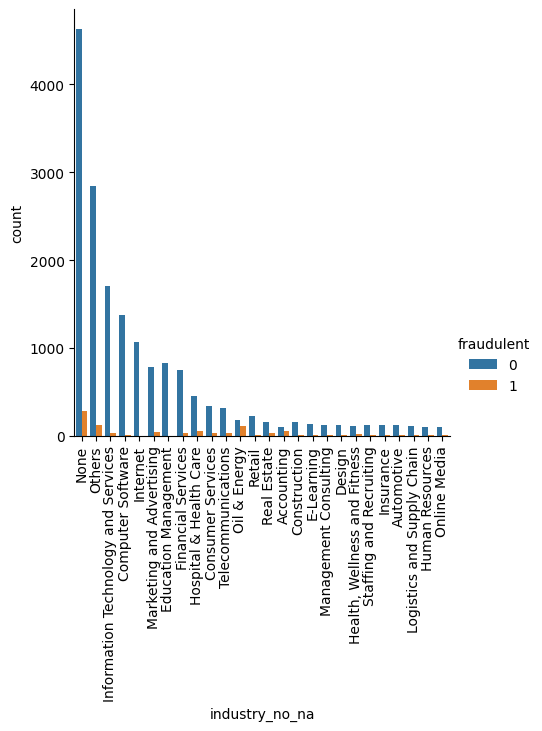

In [10]:
# Plotting the count of fraud and non-fraud cases by industry
industry_counts = tj["industry_no_na"].value_counts().sort_values(ascending=False)
sns.catplot(data = tj, x = "industry_no_na", kind = "count", order = industry_counts.index, hue = "fraudulent")
plt.xticks(rotation = 90)
plt.show()


In [ ]:
ratio_for_industry = tj.groupby('industry_no_na')["fraudulent"].agg("mean").sort_values(ascending = False)
print(ratio_for_industry)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

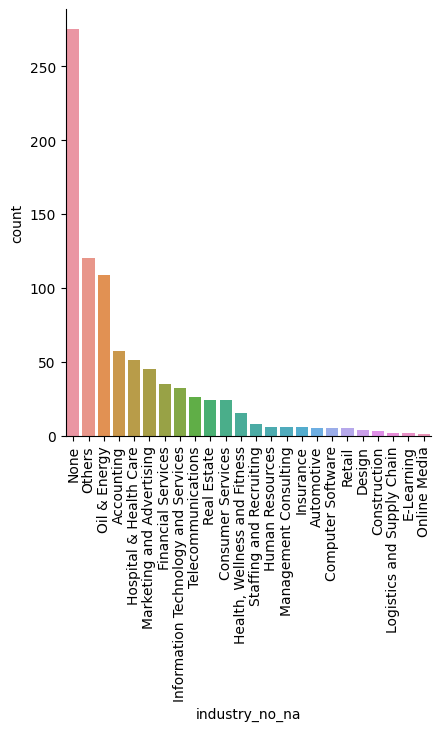

In [14]:
# Plotting distribution of counts of fraud cases for every industry

fraudulent = tj[tj["fraudulent"] == 1]
industry_fraudulent_counts = fraudulent["industry_no_na"].value_counts().sort_values(ascending=False)
sns.catplot(data = fraudulent, x = "industry_no_na", kind = "count", order = industry_fraudulent_counts.index)
plt.xticks(rotation = 90)
plt.show()


## Function
Function is categorical. To explore this variable, a barplot that shows the count of fraud and non-fraud cases by function will be plotted.

After this, the ratio of fraudulent cases for each function will be calculated and sorted in descending order to see whether there is a trend for fraudulent cases for particular functions. 

Lastly, the counts of fraudulent cases by function will be plotted in a bar graph to check whether there are particular functions with more fraudulent cases.

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

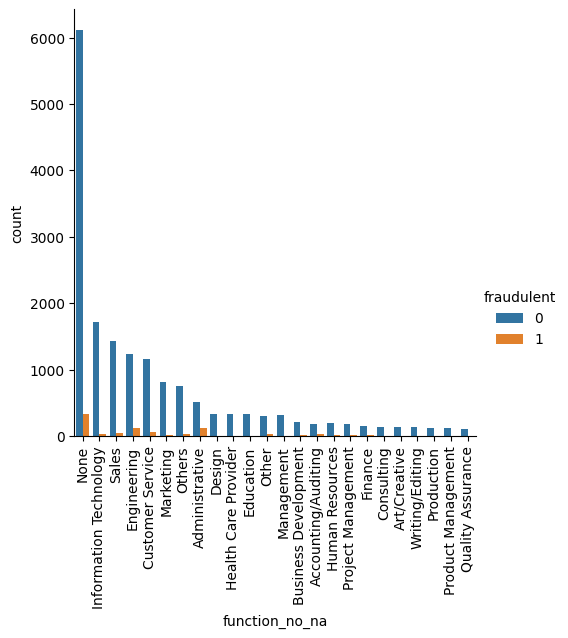

In [15]:
# Count of fraud and non-fraud cases by function
function_counts = tj["function_no_na"].value_counts().sort_values(ascending=False)
sns.catplot(data = tj, x = "function_no_na", kind = "count", order = function_counts.index, hue = "fraudulent")
plt.xticks(rotation = 90)
plt.show()

In [16]:
ratio_for_function = tj.groupby('function_no_na')["fraudulent"].agg("mean").sort_values(ascending = False)
print(ratio_for_function)

function_no_na
Administrative            0.188889
Accounting/Auditing       0.136792
Other                     0.098462
Finance                   0.087209
Engineering               0.083828
Business Development      0.057018
Project Management        0.054645
Customer Service          0.054516
None                      0.052208
Human Resources           0.043902
Others                    0.029601
Sales                     0.027929
Consulting                0.027778
Management                0.018927
Information Technology    0.018296
Marketing                 0.012048
Design                    0.008824
Art/Creative              0.007576
Education                 0.003077
Health Care Provider      0.002959
Product Management        0.000000
Production                0.000000
Quality Assurance         0.000000
Writing/Editing           0.000000
Name: fraudulent, dtype: float64


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

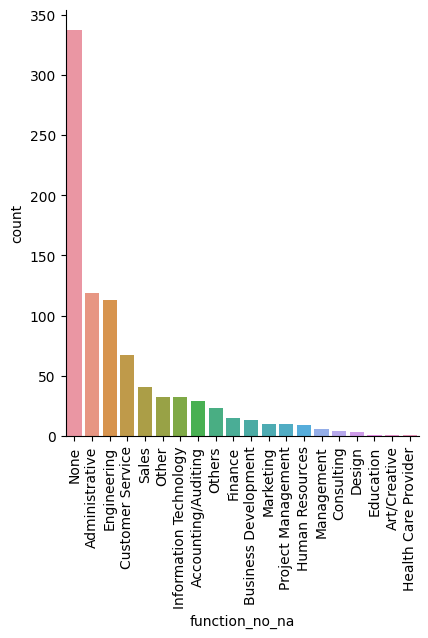

In [17]:
# Plot count of fraudulent cases by function

fraudulent = tj[tj["fraudulent"] == 1]
function_fraudulent_counts = fraudulent["function_no_na"].value_counts().sort_values(ascending=False)
sns.catplot(data = fraudulent, x = "function_no_na", kind = "count", order = function_fraudulent_counts.index)
plt.xticks(rotation = 90)
plt.show()

# Salary Range

salary_range is a text column, but it has the format of (lower limit of salary)-(upper limit of salary). For eg. it could look like "20000-50000". Hence, the lower and upper numbers were extracted to calculate the average salary in that range, as well as the magnitude of the ranges. Lastly, an additional column that was generated is whether or not the salary range was given in the first place. 

After generating the desired columns, EDA was conducted on them. 

First, the descriptive statistics for avg_salary were calculated, and its distribution was plotted in the form of a histogram and density plots. These things were done separately for fraud and non-fraud cases. 

Next, the proportion of fraudulent cases were calculated for job descriptions that provided the salary range and those that did not.  

After that, the histograms and density plots for the calculated salary ranges are plotted by fraud and non-fraud cases. This is repeated for the lower and upper limits of the salary ranges. 

In [18]:
salary_range = tj.copy()

salary_range['salary_range'] = salary_range['salary_range'].astype(str)
pattern = r'^\d+-\d+$'

mask = salary_range['salary_range'].str.match(pattern)
salary_range.loc[~mask, 'salary_range'] = None

salary_range[['lower', 'upper']] = salary_range['salary_range'].str.split('-', expand=True)

salary_range[['lower', 'upper']] = salary_range[['lower', 'upper']].apply(pd.to_numeric, errors='coerce')
salary_range["avg_salary"] = salary_range[["lower", "upper"]].mean(axis = 1)

salary_range["salary_given"] = salary_range["salary_range"].apply(lambda x: False if x == None else True)
salary_range["salary_range_calculated"] = salary_range["upper"] - salary_range["lower"]
print(salary_range.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   salary_range             2841 non-null   object 
 1   benefits                 10616 non-null  object 
 2   industry                 17880 non-null  object 
 3   function                 17880 non-null  object 
 4   fraudulent               17880 non-null  int64  
 5   industry_no_na           17880 non-null  object 
 6   function_no_na           17880 non-null  object 
 7   lower                    2841 non-null   float64
 8   upper                    2841 non-null   float64
 9   avg_salary               2841 non-null   float64
 10  salary_given             17880 non-null  bool   
 11  salary_range_calculated  2841 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(6)
memory usage: 1.5+ MB
None


In [24]:
# Descriptive stats on avg_salary and a histogram of it. But clearly its not super helpful lols.

print("Descriptive Statistics for average salary for fraudulent cases: ")
print(salary_range[salary_range['fraudulent'] == 1]['avg_salary'].describe())
print("\nMean and Standard Deviation for average salary for fraudulent cases: ")
print("Mean: "+ str(salary_range[salary_range['fraudulent'] == 1]['avg_salary'].mean()))
print("SD: " + str(salary_range[salary_range['fraudulent'] == 1]['avg_salary'].std()))

print("\nDescriptive Statistics for average salary for non-fraudulent cases: ")
print(salary_range[salary_range['fraudulent'] == 0]['avg_salary'].describe())
print("\nMean and Standard Deviation for average salary for non-fraudulent cases: ")
print("Mean: "+ str(salary_range[salary_range['fraudulent'] == 0]['avg_salary'].mean()))
print("SD: " + str(salary_range[salary_range['fraudulent'] == 0]['avg_salary'].std()))

# From looking at the mean and sd, there seems to be outliers. This will be further explored by plotting histograms. 


Descriptive Statistics for average salary for fraudulent cases: 
count    2.220000e+02
mean     1.131735e+05
std      5.149784e+05
min      0.000000e+00
25%      2.550000e+04
50%      3.750000e+04
75%      7.000000e+04
max      7.424352e+06
Name: avg_salary, dtype: float64

Mean and Standard Deviation for average salary for fraudulent cases: 
Mean: 113173.4572072072
SD: 514978.35574349

Descriptive Statistics for average salary for non-fraudulent cases: 
count    2.619000e+03
mean     7.107716e+05
std      2.330176e+07
min      0.000000e+00
25%      2.200000e+04
50%      4.500000e+04
75%      7.500000e+04
max      1.000000e+09
Name: avg_salary, dtype: float64

Mean and Standard Deviation for average salary for non-fraudulent cases: 
Mean: 710771.6489117984
SD: 23301755.90831503


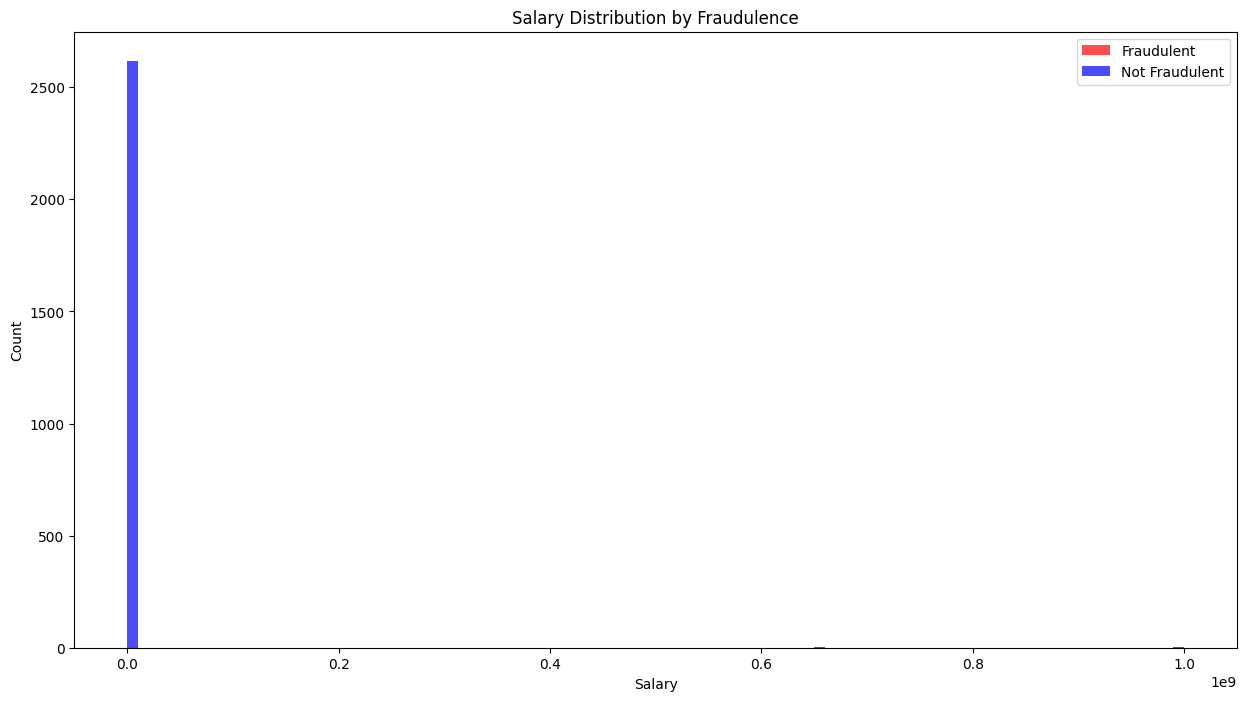

In [25]:
# Plotting the distribution of average salary by fraud and non-fraud cases.

fig, ax = plt.subplots(figsize=(15,8))
plt.hist(salary_range[salary_range['fraudulent'] == 1]['avg_salary'], bins=100, color='red', alpha=0.7, label='Fraudulent')
plt.hist(salary_range[salary_range['fraudulent'] == 0]['avg_salary'], bins=100, color='blue', alpha=0.7, label='Not Fraudulent')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Salary Distribution by Fraudulence')
plt.legend()
plt.show()

# Outliers are present. 

In [29]:
# This line seeks to discover the obvious outliers for fraudulent cases

salary_range.loc[(salary_range["avg_salary"] > 2000000) & (salary_range["fraudulent"] == 1),:]

,salary_range,benefits,industry,function,fraudulent,industry_no_na,function_no_na,lower,upper,avg_salary,salary_given,salary_range_calculated
5073,6266624-8582080,san jose water company offers a very comprehen...,Utilities,Engineering,1,Others,Engineering,6266624.0,8582080.0,7424352.0,True,2315456.0


In [42]:
# This line seeks to discover the obvious outliers for non-fraud cases
salary_range.loc[(salary_range["avg_salary"] > 2000000) & (salary_range["fraudulent"] == 0),:]

,salary_range,benefits,industry,function,fraudulent,industry_no_na,function_no_na,lower,upper,avg_salary,salary_given,salary_range_calculated
376,120000-15000000,full benefits fortune 500 company,Financial Services,Information Technology,0,Financial Services,Information Technology,120000.0,1.500000e+07,7.560000e+06,True,14880000.0
2734,0-9360000,NaN,Hospital & Health Care,Health Care Provider,0,Hospital & Health Care,Health Care Provider,0.0,9.360000e+06,4.680000e+06,True,9360000.0
3139,800000000-1200000000,NaN,Consumer Goods,Sales,0,Others,Sales,800000000.0,1.200000e+09,1.000000e+09,True,400000000.0
4927,3000000-4000000,NaN,Retail,Management,0,Retail,Management,3000000.0,4.000000e+06,3.500000e+06,True,1000000.0
6747,2000000-15000000,work in the location of your choiceexcellent c...,Human Resources,Sales,0,Human Resources,Sales,2000000.0,1.500000e+07,8.500000e+06,True,13000000.0
6760,6000000-7000000,an equal opportunity employer is an equal oppo...,Government Administration,General Business,0,Others,Others,6000000.0,7.000000e+06,6.500000e+06,True,1000000.0
7651,150000-16500000,full benefits and bonus fast growing company,Information Technology and Services,Information Technology,0,Information Technology and Services,Information Technology,150000.0,1.650000e+07,8.325000e+06,True,16350000.0
12251,500000000-800000000,tba,Consumer Goods,Sales,0,Others,Sales,500000000.0,8.000000e+08,6.500000e+08,True,300000000.0
12392,2000000-2263000,NaN,Accounting,Accounting/Auditing,0,Accounting,Accounting/Auditing,2000000.0,2.263000e+06,2.131500e+06,True,263000.0


Salary Range Descriptive Statistics: 
count    2.830000e+03
mean     6.572954e+04
std      1.093162e+05
min      0.000000e+00
25%      2.200000e+04
50%      4.500000e+04
75%      7.250000e+04
max      1.550000e+06
Name: avg_salary, dtype: float64
Salary Range's Standard Deviation: 109316.1954310262


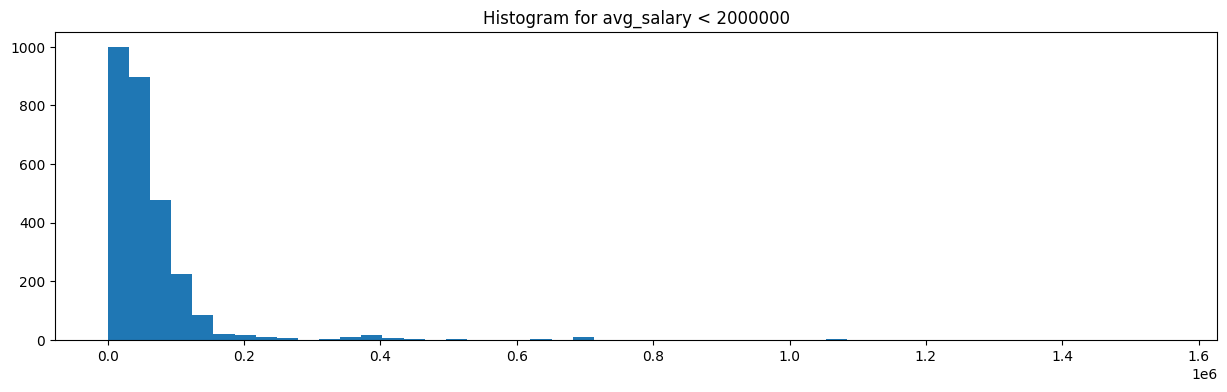

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

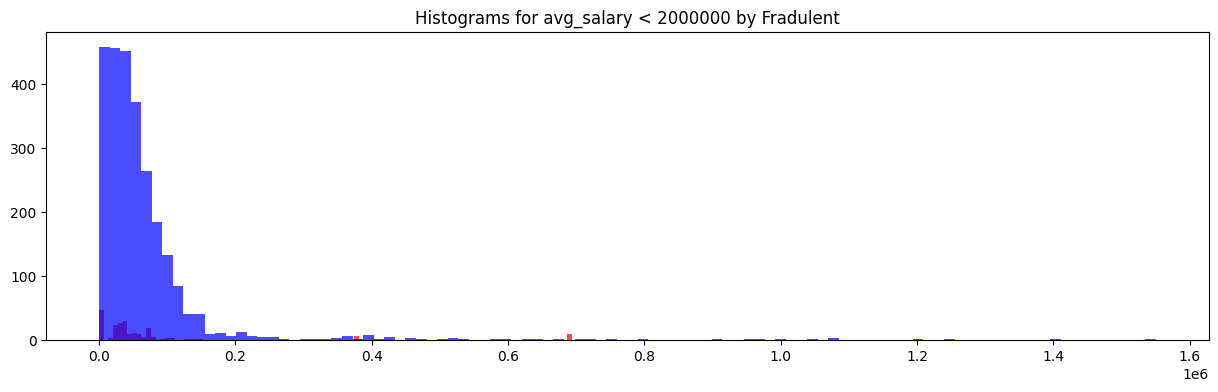

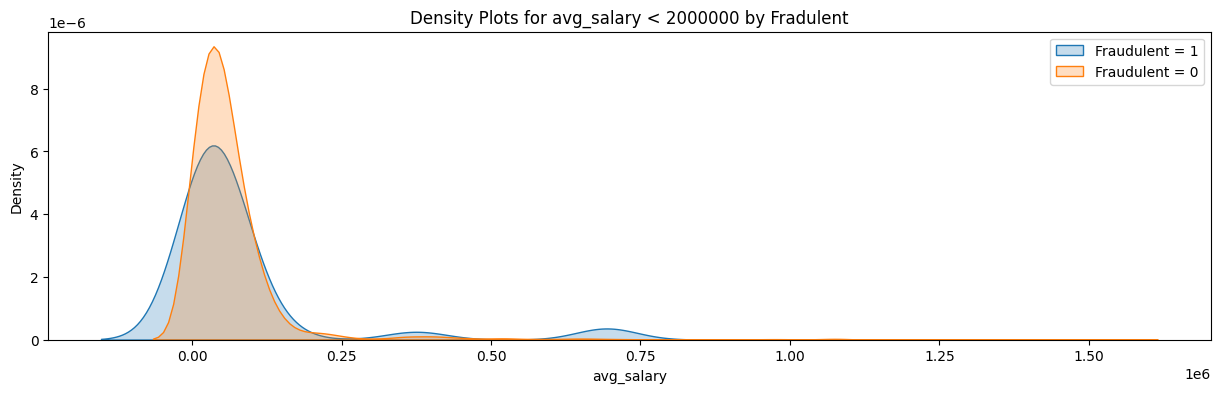

In [39]:
# Filter the values where avg_salary are < 2,000,000 

salary_range_helper = salary_range.copy()
salary_range_helper["avg_salary"].fillna(-1, inplace = True)
salary_range_helper = salary_range_helper[salary_range_helper["avg_salary"] < 2000000] # we lose only 11 values
salary_range_helper["avg_salary"].replace(-1, float('nan'), inplace = True)

print("Salary Range Descriptive Statistics: ")
print(salary_range_helper["avg_salary"].describe())
print("Salary Range's Standard Deviation: " + str(salary_range_helper["avg_salary"].std()))

fig, ax = plt.subplots(figsize=(15,4))
plt.hist(salary_range_helper["avg_salary"], bins = 50)
plt.title("Histogram for avg_salary < 2000000")
plt.show()

fig, ax = plt.subplots(figsize=(15,4))
plt.hist(salary_range_helper[salary_range_helper['fraudulent'] == 1]['avg_salary'], bins=100, color='red', alpha=0.7, label='Fraudulent')
plt.hist(salary_range_helper[salary_range_helper['fraudulent'] == 0]['avg_salary'], bins=100, color='blue', alpha=0.7, label='Not Fraudulent')
plt.title("Histograms for avg_salary < 2000000 by Fradulent")

fig, ax = plt.subplots(figsize=(15,4))
sns.kdeplot(salary_range_helper['avg_salary'][salary_range_helper['fraudulent'] == 1], label='Fraudulent = 1', fill=True)
sns.kdeplot(salary_range_helper['avg_salary'][salary_range_helper['fraudulent'] == 0], label='Fraudulent = 0', fill=True)
plt.title("Density Plots for avg_salary < 2000000 by Fradulent")
plt.legend()

In [43]:
ratio_for_fraud_for_salary_given = salary_range_helper.groupby('salary_given')["fraudulent"].agg("mean").sort_values(ascending = False)
print(ratio_for_fraud_for_salary_given)

salary_given
True     0.078092
False    0.042822
Name: fraudulent, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_2876\1654310414.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(salary_range_helper['salary_range_calculated'][salary_range_helper['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_2876\1654310414.py:8

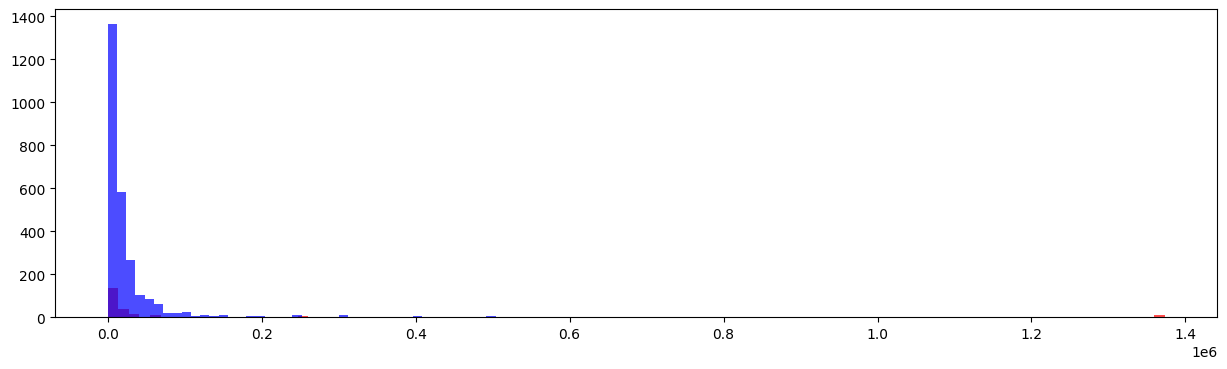

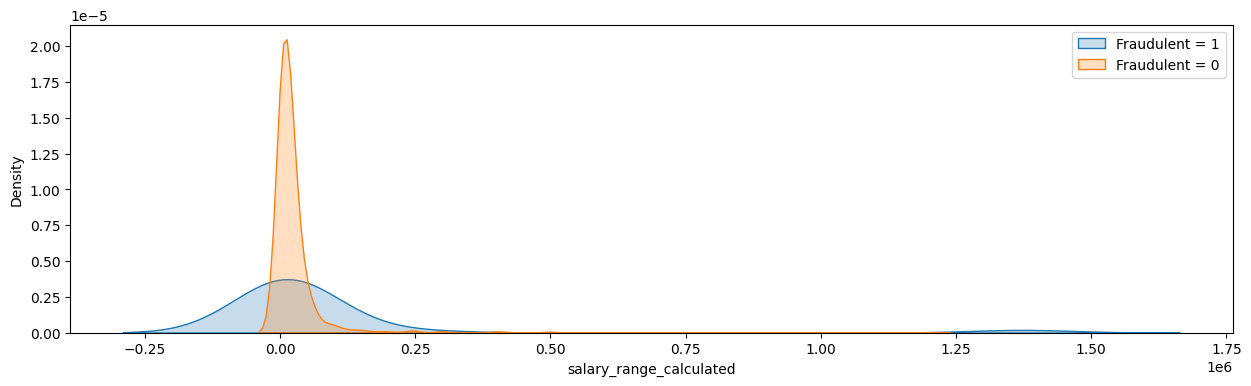

In [47]:
# Salary ranges
fig, ax = plt.subplots(figsize=(15,4))
plt.hist(salary_range_helper[salary_range_helper['fraudulent'] == 1]['salary_range_calculated'], bins=100, color='red', alpha=0.7, label='Fraudulent')
plt.hist(salary_range_helper[salary_range_helper['fraudulent'] == 0]['salary_range_calculated'], bins=100, color='blue', alpha=0.7, label='Not Fraudulent')

fig, ax = plt.subplots(figsize=(15,4))
sns.kdeplot(salary_range_helper['salary_range_calculated'][salary_range_helper['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
sns.kdeplot(salary_range_helper['salary_range_calculated'][salary_range_helper['fraudulent'] == 0], label='Fraudulent = 0', shade=True)
plt.legend()

C:\Users\user\AppData\Local\Temp\ipykernel_2876\3532207885.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(salary_range_helper['lower'][salary_range_helper['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_2876\3532207885.py:7: FutureWarning: 


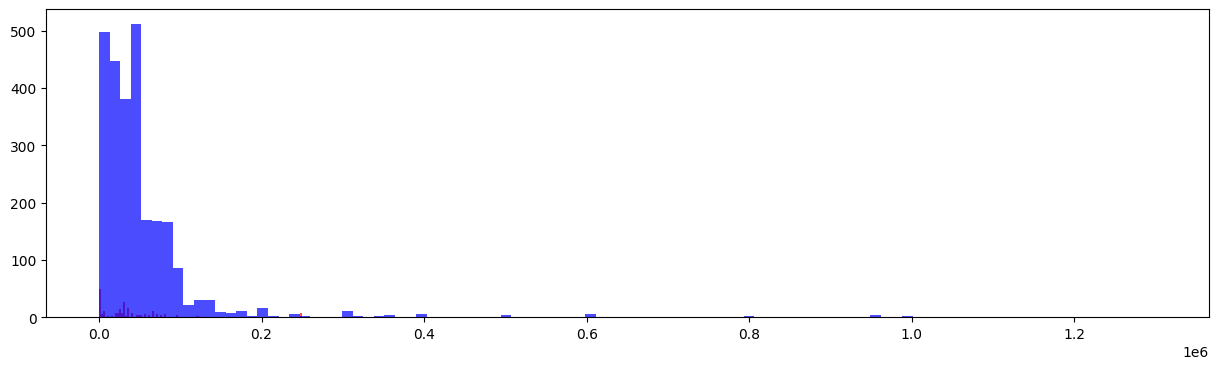

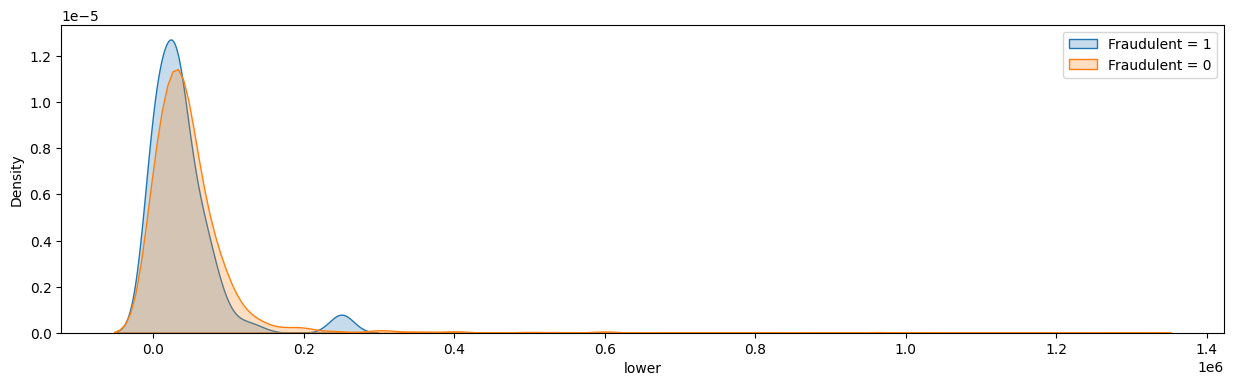

In [48]:
fig, ax = plt.subplots(figsize=(15,4))
plt.hist(salary_range_helper[salary_range_helper['fraudulent'] == 1]['lower'], bins=100, color='red', alpha=0.7, label='Fraudulent')
plt.hist(salary_range_helper[salary_range_helper['fraudulent'] == 0]['lower'], bins=100, color='blue', alpha=0.7, label='Not Fraudulent')

fig, ax = plt.subplots(figsize=(15,4))
sns.kdeplot(salary_range_helper['lower'][salary_range_helper['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
sns.kdeplot(salary_range_helper['lower'][salary_range_helper['fraudulent'] == 0], label='Fraudulent = 0', shade=True)
plt.legend()

C:\Users\user\AppData\Local\Temp\ipykernel_2876\3444442148.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(salary_range_helper['upper'][salary_range_helper['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_2876\3444442148.py:7: FutureWarning: 


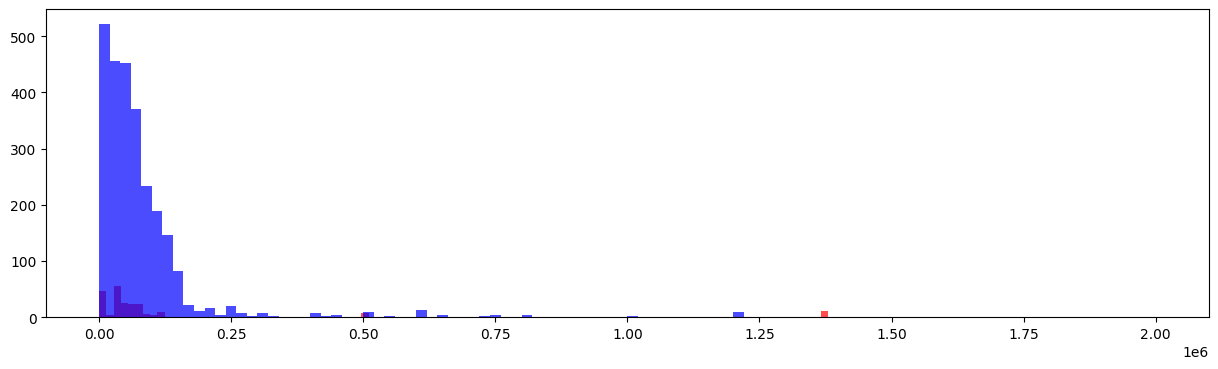

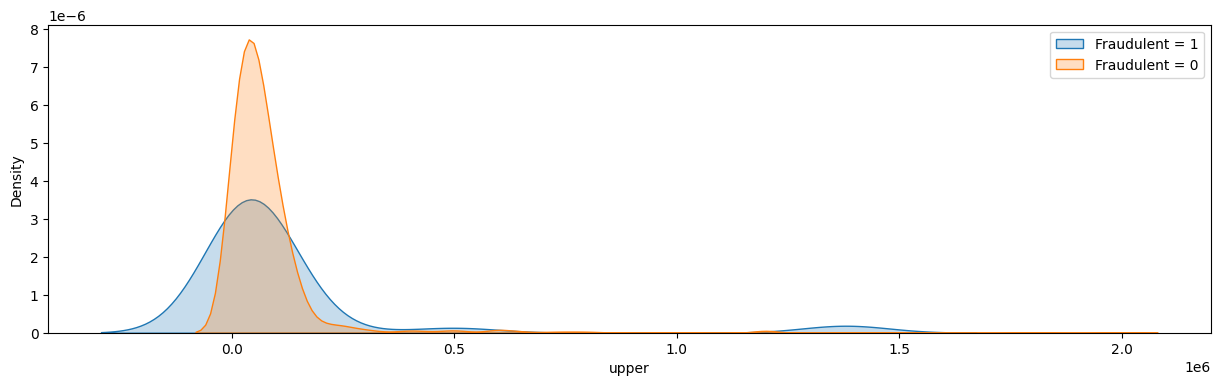

In [49]:
fig, ax = plt.subplots(figsize=(15,4))
plt.hist(salary_range_helper[salary_range_helper['fraudulent'] == 1]['upper'], bins=100, color='red', alpha=0.7, label='Fraudulent')
plt.hist(salary_range_helper[salary_range_helper['fraudulent'] == 0]['upper'], bins=100, color='blue', alpha=0.7, label='Not Fraudulent')

fig, ax = plt.subplots(figsize=(15,4))
sns.kdeplot(salary_range_helper['upper'][salary_range_helper['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
sns.kdeplot(salary_range_helper['upper'][salary_range_helper['fraudulent'] == 0], label='Fraudulent = 0', shade=True)
plt.legend()

## Benefits

Benefits is a textual column, and there will be various ways to conduct EDA on it. 

Firstly, the number of characters, words and the average length of words are calculated and visualised. The ratio of fraudulent cases are calculated as well, for job descriptions that provide a description of the benefits, and for those that do not. 

After that, NLP was performed on the column. This will be further described below. 

In [50]:
benefits = tj.copy()

benefits["benefits_with_na"] = benefits["benefits"].fillna("")

def transform_text(text):
    return re.sub(r'(phone|email|url)_', r'\1 ', text)
benefits['benefits_with_na'] = benefits['benefits_with_na'].apply(lambda x: transform_text(x) if pd.notnull(x) else x)

print(benefits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   salary_range      2868 non-null   object
 1   benefits          10616 non-null  object
 2   industry          17880 non-null  object
 3   function          17880 non-null  object
 4   fraudulent        17880 non-null  int64 
 5   industry_no_na    17880 non-null  object
 6   function_no_na    17880 non-null  object
 7   benefits_with_na  17880 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.1+ MB
None


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

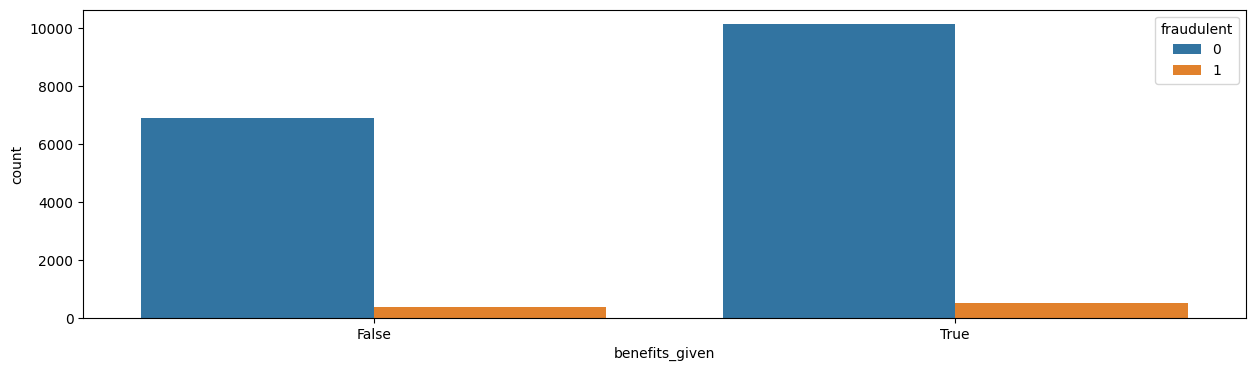

benefits_given
False    0.050248
True     0.047193
Name: fraudulent, dtype: float64


In [51]:
# Find number of characters, words, and average word length

# number of characters
benefits['num_char_benefits'] = benefits['benefits_with_na'].apply(len)

# number of words
def word_count(string): 
    words = string.split()
    return len(words)

benefits['num_words_benefits'] = benefits['benefits_with_na'].apply(word_count)

# average word length
benefits['avg_word_length_benefits'] = benefits['num_char_benefits']/benefits['num_words_benefits']
benefits['avg_word_length_benefits'].replace([np.inf, -np.inf], 0, inplace=True)
benefits['avg_word_length_benefits'].fillna(0, inplace = True)
#benefits.head()
# print(benefits["num_char_benefits"].value_counts())
# print(benefits["num_words_benefits"].value_counts())
# print(benefits["avg_word_length_benefits"].value_counts())
# The above print statements prove that only the benefits with NaN were converted to have 0s. There were no benefits that were "" by themselves. 

benefits["benefits_given"] = benefits["benefits_with_na"].apply(lambda x: False if x == "" else True)

fig, ax = plt.subplots(figsize=(15,4))
sns.countplot(data = benefits, x = "benefits_given", hue = "fraudulent")
plt.show()

ratio_for_fraud_for_benefits_given = benefits.groupby('benefits_given')["fraudulent"].agg("mean").sort_values(ascending = False)
print(ratio_for_fraud_for_benefits_given)

In [ ]:
# Run this chunk of code if you want to see what happened to the rows with phone_ or email_ or url_

# phone_email_rows = benefits[benefits['benefits_with_na'].str.contains(r'\b(phone|email|url)')]
# #print(phone_email_rows["benefits_with_na"].to_string(index=False))
# for index, row in phone_email_rows.iterrows():
#     print(row["benefits_with_na"])

C:\Users\user\AppData\Local\Temp\ipykernel_2876\1138764176.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(benefits1["num_char_benefits"][benefits1['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_2876\1138764176.py:6: FutureWarning: 

`shade`

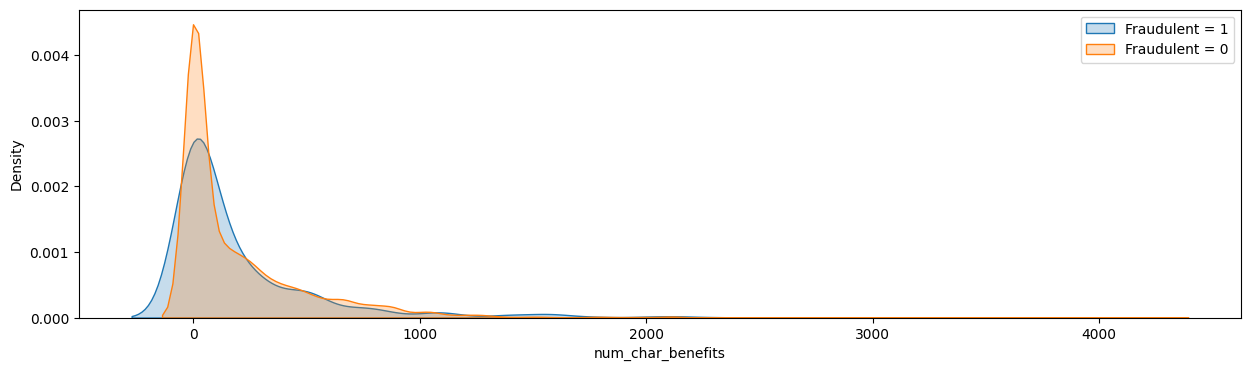

In [53]:
# charts for number of characters
benefits1 = benefits.copy()

fig, ax = plt.subplots(figsize=(15,4))
sns.kdeplot(benefits1["num_char_benefits"][benefits1['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
sns.kdeplot(benefits1["num_char_benefits"][benefits1['fraudulent'] == 0], label='Fraudulent = 0', shade=True)
plt.legend()

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

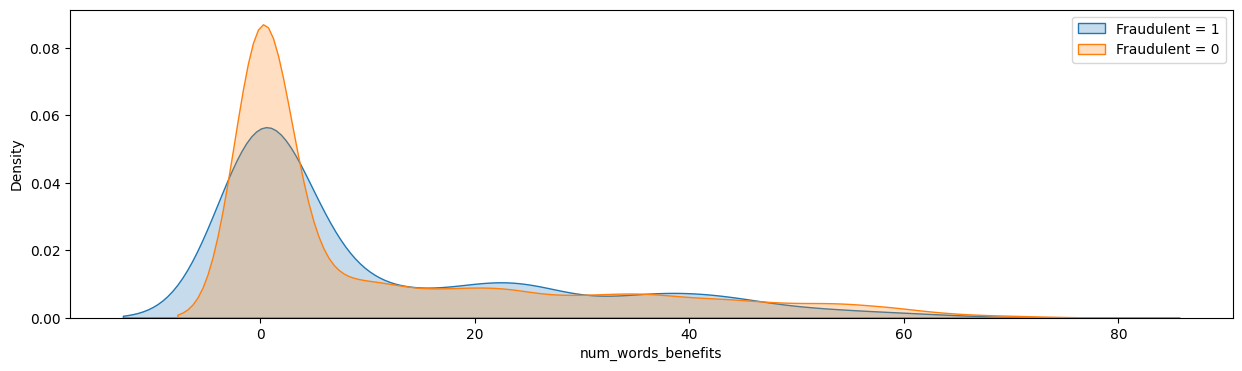

In [54]:
# charts for number of words

benefits2 = benefits.copy()
benefits2 = benefits2.loc[benefits2["num_char_benefits"] < 400]

fig, ax = plt.subplots(figsize=(15,4))
sns.kdeplot(benefits2["num_words_benefits"][benefits2['fraudulent'] == 1], label='Fraudulent = 1', fill=True)
sns.kdeplot(benefits2["num_words_benefits"][benefits2['fraudulent'] == 0], label='Fraudulent = 0', fill=True)
plt.legend()

C:\Users\user\AppData\Local\Temp\ipykernel_2876\2951825796.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(benefits3["avg_word_length_benefits"][benefits3['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_2876\2951825796.py:7: FutureWarning: 



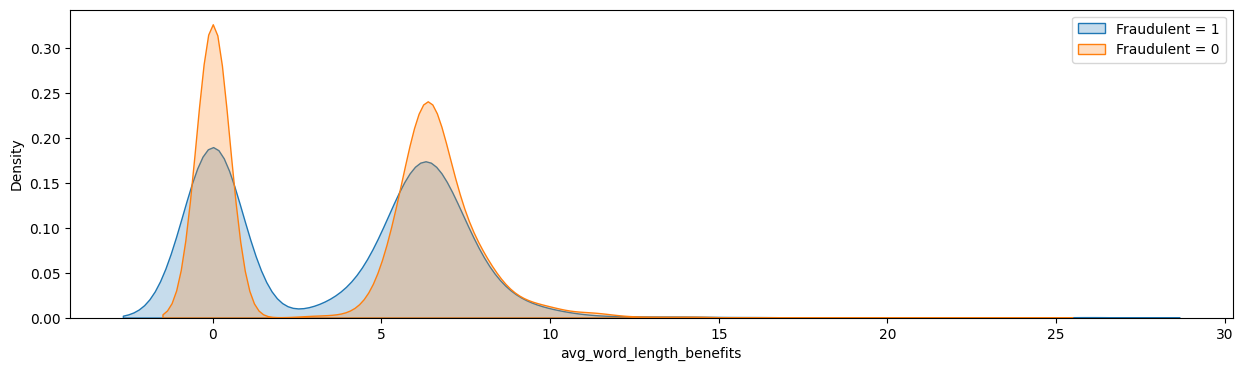

In [55]:
# charts for avg length of words

benefits3 = benefits.copy()

fig, ax = plt.subplots(figsize=(15,4))
sns.kdeplot(benefits3["avg_word_length_benefits"][benefits3['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
sns.kdeplot(benefits3["avg_word_length_benefits"][benefits3['fraudulent'] == 0], label='Fraudulent = 0', shade=True)
plt.legend()

## Benefits NLP EDA

Firstly, Bag of Words analysis was done, then bi-gram and tri-gram analysis was conducted. 

Then word clouds were generated for both fraud and non-fraud cases.

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
benefits4 = benefits.copy()
X = vectorizer.fit_transform(benefits.loc[benefits["fraudulent"] == 1, 'benefits_with_na'])
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
total_word_counts = bow_df.sum(axis=0)


print(total_word_counts.sort_values(ascending = False)[total_word_counts.sort_values(ascending = False) < 185].head(20))

Y = vectorizer.fit_transform(benefits.loc[benefits["fraudulent"] == 0, 'benefits_with_na'])
bow_df1 = pd.DataFrame(Y.toarray(), columns=vectorizer.get_feature_names_out())
total_word_counts1 = bow_df1.sum(axis=0)
print(total_word_counts1.sort_values(ascending = False)[total_word_counts1.sort_values(ascending = False) < 3000].head(20))

# BoW analysis doesnt tell me much

time           161
paid           149
be             147
training       145
environment    139
competitive    130
full           129
life           126
get            123
opportunity    119
offer          119
working        119
employee       117
can            116
it             115
start          108
email          108
salary         100
world           99
skills          99
dtype: int64
competitive    2913
team           2644
that           2525
be             2521
salary         2408
time           2335
paid           2249
at             2199
have           2037
amp            2015
all            1980
from           1957
dental         1905
offer          1852
full           1840
insurance      1790
or             1767
opportunity    1722
this           1697
working        1673
dtype: int64


In [60]:
# Trigrams for fraudulent cases

trigram_vectorizer = CountVectorizer(ngram_range=(2,3))
benefits5 = benefits.copy()
x = trigram_vectorizer.fit_transform(benefits5.loc[benefits5["fraudulent"] == 1, 'benefits_with_na'])
x_df = pd.DataFrame(x.toarray(), columns=trigram_vectorizer.get_feature_names_out())
total_trigram_count_x = x_df.sum(axis=0)


print(total_trigram_count_x.sort_values(ascending = False).head(20))
# print(x_df.head())

we offer             114
get started           93
we are                89
you can               86
benefits and          73
this is               73
work life             68
benefits package      66
time off              64
online training       63
are encouraged to     59
are encouraged        59
encouraged to         59
and we                59
you are               55
an industry           55
in an                 53
work life balance     51
life balance          51
to the                50
dtype: int64


In [61]:
# Trigrams for non-fraudulent cases

y = trigram_vectorizer.fit_transform(benefits5.loc[benefits5["fraudulent"] == 0, 'benefits_with_na'])
y_df = pd.DataFrame(y.toarray(), columns=trigram_vectorizer.get_feature_names_out())
total_trigram_count_y = y_df.sum(axis=0)


print(total_trigram_count_y.sort_values(ascending = False).head(20))

# interesting, turns out if the thing says see job description that got higher chance for it to be non fraud. Also more emphasis on dental and vision, competitive salary, mention of vacation hour. 

# fraudulent is more on the what you dont need entry level, get started

of the                 1889
in the                 1561
you will               1312
we offer               1244
will be                1169
we are                 1107
competitive salary     1041
to work                 971
part of                 926
opportunity to          925
benefits package        884
full time               838
we have                 797
to the                  777
job description         774
see job                 726
see job description     726
medical dental          713
if you                  704
you can                 665
dtype: int64


In [62]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

benefits6 = benefits.copy()

lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

# Function to lemmatize a sentence
def preprocess_sentence(sentence):
    #words = re.findall(r'\b\w+\b', sentence)
    words = word_tokenize(sentence)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]
    return ' '.join(lemmatized_words)

# Apply lemmatization to the entire column
benefits6['lemmatized_benefits'] = benefits6['benefits_with_na'].apply(preprocess_sentence)


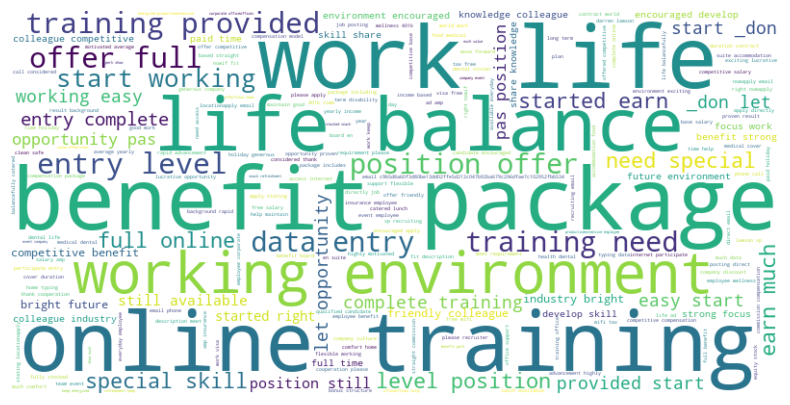

In [63]:
# wordcloud for frauds
all_lemmatized_benefits_fraud = ' '.join(benefits6.loc[benefits6["fraudulent"] == 1, 'lemmatized_benefits'])

# Generate word cloud
wordcloud_fraud = WordCloud(width=800, height=400, background_color='white').generate(all_lemmatized_benefits_fraud)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fraud, interpolation='bilinear')
plt.axis("off")
plt.show()

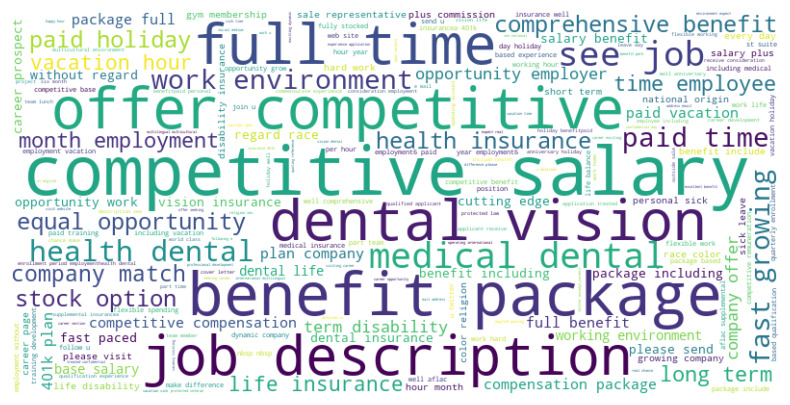

In [64]:
# wordcloud for non-frauds
all_lemmatized_benefits_non_fraud = ' '.join(benefits6.loc[benefits6["fraudulent"] == 0, 'lemmatized_benefits'])

# Generate word cloud
wordcloud_non_fraud = WordCloud(width=800, height=400, background_color='white').generate(all_lemmatized_benefits_non_fraud)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_fraud, interpolation='bilinear')
plt.axis("off")
plt.show()